In [17]:
import pandas as pd;

In [ ]:
data=pd.read_csv("Boston.csv")
data.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


iter=0    weight=1.83    bias=0.4559    cost=3.2e+02
iter=10    weight=4.46    bias=1.8224    cost=1.5e+02
iter=20    weight=4.33    bias=2.5904    cost=1.5e+02
iter=30    weight=4.18    bias=3.3204    cost=1.4e+02
iter=40    weight=4.04    bias=4.0177    cost=1.3e+02
iter=50    weight=3.90    bias=4.6837    cost=1.3e+02
iter=60    weight=3.77    bias=5.3199    cost=1.3e+02
iter=70    weight=3.65    bias=5.9275    cost=1.2e+02
iter=80    weight=3.53    bias=6.5080    cost=1.2e+02
iter=90    weight=3.42    bias=7.0624    cost=1.2e+02
iter=100    weight=3.31    bias=7.5919    cost=1.1e+02
iter=110    weight=3.21    bias=8.0977    cost=1.1e+02
iter=120    weight=3.11    bias=8.5809    cost=1.1e+02
iter=130    weight=3.02    bias=9.0423    cost=1.1e+02
iter=140    weight=2.93    bias=9.4831    cost=1e+02
iter=150    weight=2.85    bias=9.9042    cost=1e+02
iter=160    weight=2.76    bias=10.3063    cost=1e+02
iter=170    weight=2.69    bias=10.6905    cost=9.8e+01
iter=180    weight=2.61  

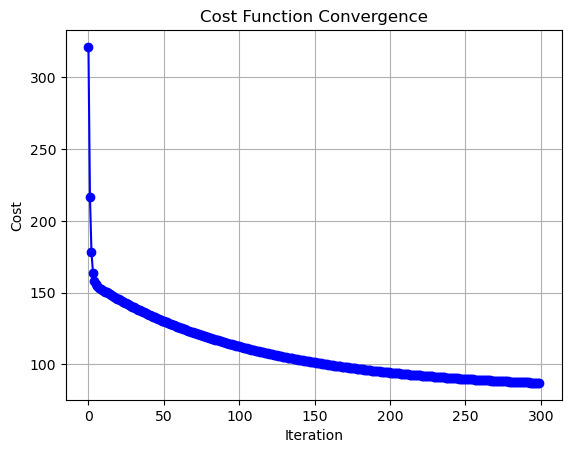

M : 1.9469329242124254 C: 14.34582477777549
accuray: 0.7745098039215687
error: 67.42419631070689


In [32]:
# COST FUNCTION
def cost_function(price,distance,weight,bias):
    n=len(distance)
    total_error=0
    for i in range(n):
        total_error+=(price[i]-(weight*distance[i]+bias))**2
    return total_error/n

# UPDATING WEIGHTS
# gradient
def update_weights_gradient(price,distance,weight,bias,learning_rate):
    weight_der=0
    bias_der=0
    n=len(price)

    for i in range(n):
        weight_der+=-2*distance[i]*(price[i]-(weight*distance[i]+bias))

        bias_der+=-2*(price[i]-(distance[i]*weight+bias))
    
    weight-=(weight_der/n)*learning_rate
    bias-=(bias_der/n)*learning_rate
    return weight,bias

# TRAINING
def train(price,distance,weight,bias,learning_rate,iters):
    cost_history=[]

    for i in range(iters):
        weight,bias=update_weights_gradient(price,distance,weight,bias,learning_rate)

        cost=cost_function(price,distance,weight,bias)
        cost_history.append(cost)

        if i%10==0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
    return weight,bias,cost_history


# MAIN FUNCTION
from sklearn.model_selection import train_test_split

distance=data['Distance to Employment Centres']
price=data['median home price']

distance_train, distance_test, price_train, price_test = train_test_split(
    distance, price, test_size=0.2, random_state=42
)

distance_train = distance_train.reset_index(drop=True)
price_train = price_train.reset_index(drop=True)

weight =0
bias=0
lr=0.01
iters=300
final_weight,final_bias,cost=train(price_train,distance_train,weight,bias,lr,iters)

import matplotlib.pyplot as plt
plt.plot(range(iters), cost, marker='o', linestyle='-', color='b', label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

print(f"M : {final_weight} C: {final_bias}")



def find_accuracy(price_test,distance_test,final_weight,final_bias):
    n=len(price_test)
    true_values=0
    for i in range(n):
        if ((price_test[i]-(final_weight*distance_test[i]+final_bias))<3):
            true_values+=1
    print(f"accuray: {true_values/n}")
distance_test = distance_test.reset_index(drop=True)
price_test = price_test.reset_index(drop=True)
find_accuracy(price_test,distance_test,final_weight,final_bias)

print(f"error: {cost_function(price_test,distance_test,final_weight,final_bias)}")

iter=0    weight=1.83    bias=0.4559    cost=3.2e+02
iter=10    weight=4.46    bias=1.8224    cost=1.5e+02
iter=20    weight=4.33    bias=2.5904    cost=1.5e+02
iter=30    weight=4.18    bias=3.3204    cost=1.4e+02
iter=40    weight=4.04    bias=4.0177    cost=1.3e+02
iter=50    weight=3.90    bias=4.6837    cost=1.3e+02
iter=60    weight=3.77    bias=5.3199    cost=1.3e+02
iter=70    weight=3.65    bias=5.9275    cost=1.2e+02
iter=80    weight=3.53    bias=6.5080    cost=1.2e+02
iter=90    weight=3.42    bias=7.0624    cost=1.2e+02
iter=100    weight=3.31    bias=7.5919    cost=1.1e+02
iter=110    weight=3.21    bias=8.0977    cost=1.1e+02
iter=120    weight=3.11    bias=8.5809    cost=1.1e+02
iter=130    weight=3.02    bias=9.0423    cost=1.1e+02
iter=140    weight=2.93    bias=9.4831    cost=1e+02
iter=150    weight=2.85    bias=9.9042    cost=1e+02
iter=160    weight=2.76    bias=10.3063    cost=1e+02
iter=170    weight=2.69    bias=10.6905    cost=9.8e+01
iter=180    weight=2.61  

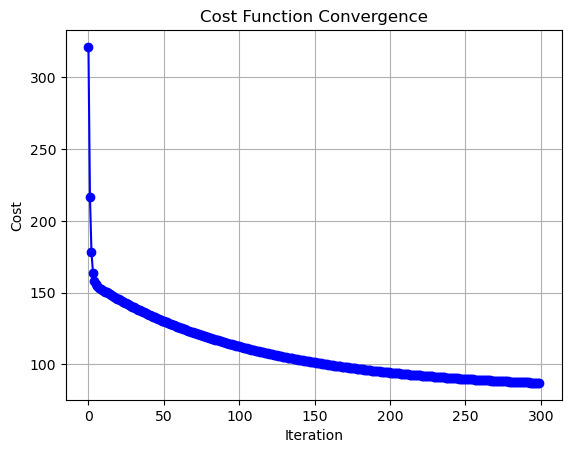

M : 1.9469329242124254 C: 14.34582477777549
accuray: 0.7745098039215687
error: 67.42419631070689


In [33]:
# COST FUNCTION
def cost_function(price,distance,weight,bias):
    n=len(distance)
    total_error=0
    for i in range(n):
        total_error+=(price[i]-(weight*distance[i]+bias))**2
    return total_error/n

# UPDATING WEIGHTS
# gradient
def update_weights_gradient(price,distance,weight,bias,learning_rate):
    weight_der=0
    bias_der=0
    n=len(price)

    for i in range(n):
        weight_der+=-2*distance[i]*(price[i]-(weight*distance[i]+bias))

        bias_der+=-2*(price[i]-(distance[i]*weight+bias))
    
    weight-=(weight_der/n)*learning_rate
    bias-=(bias_der/n)*learning_rate
    return weight,bias

# TRAINING
def train(price,distance,weight,bias,learning_rate,iters):
    cost_history=[]

    for i in range(iters):
        weight,bias=update_weights_gradient(price,distance,weight,bias,learning_rate)

        cost=cost_function(price,distance,weight,bias)
        cost_history.append(cost)

        if i%10==0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, weight, bias, cost))
    return weight,bias,cost_history


# MAIN FUNCTION
from sklearn.model_selection import train_test_split

distance=data['Distance to Employment Centres']
price=data['median home price']

distance_train, distance_test, price_train, price_test = train_test_split(
    distance, price, test_size=0.2, random_state=42
)

distance_train = distance_train.reset_index(drop=True)
price_train = price_train.reset_index(drop=True)

weight =0
bias=0
lr=0.01
iters=300
final_weight,final_bias,cost=train(price_train,distance_train,weight,bias,lr,iters)

import matplotlib.pyplot as plt
plt.plot(range(iters), cost, marker='o', linestyle='-', color='b', label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

print(f"M : {final_weight} C: {final_bias}")



def find_accuracy(price_test,distance_test,final_weight,final_bias):
    n=len(price_test)
    true_values=0
    for i in range(n):
        if ((price_test[i]-(final_weight*distance_test[i]+final_bias))<3):
            true_values+=1
    print(f"accuray: {true_values/n}")
distance_test = distance_test.reset_index(drop=True)
price_test = price_test.reset_index(drop=True)
find_accuracy(price_test,distance_test,final_weight,final_bias)

print(f"error: {cost_function(price_test,distance_test,final_weight,final_bias)}")